In [1]:
from Archivos_Apoyo.AngleCouplingAnalyzer import AngleCouplingAnalyzer
ruta_entrenamiento_robot="logs_lift_leg/general_values_20251012_215515.pid9096.csv"
ruta_recompensas="logs_lift_leg/rewards_20251012_215515.pid9096.csv"
anglecouplinganalyzer=AngleCouplingAnalyzer()

In [2]:
df_general=anglecouplinganalyzer.cargar_csv(ruta_entrenamiento_robot)
df_recompensas=anglecouplinganalyzer.cargar_csv(ruta_recompensas)

In [3]:
angulos_joints=anglecouplinganalyzer.split_parameters_df(df_general, startswith="q_")
angular_speed=anglecouplinganalyzer.split_parameters_df(df_general, startswith="vel_")
torque=anglecouplinganalyzer.split_parameters_df(df_general, startswith="τ_reaction_")
forces=anglecouplinganalyzer.split_parameters_df(df_general, startswith="Forces_")
pressures=anglecouplinganalyzer.split_parameters_df(df_general, startswith="Pressure_")
coms=anglecouplinganalyzer.split_parameters_df(df_general, startswith="COM_")
zmps=anglecouplinganalyzer.split_parameters_df(df_general, startswith="ZMP_")
df_angle_speed = df_general.loc[:, df_general.columns.str.startswith(("q_", "vel_"))]
df_angle_com = df_general.loc[:, df_general.columns.str.startswith(("q_left_hip", "q_right_hip", "COM_"))]
df_presiones_velocidades=df_general.loc[:, df_general.columns.str.startswith(("vel_", "Pressure_"))]

In [4]:
df_presiones_velocidades

,vel_left_hip_pitch_joint,Pressure_left_hip_pitch_jointflexion,Pressure_left_hip_pitch_jointextension,vel_left_hip_roll_joint,Pressure_left_hip_roll_jointflexion,Pressure_left_hip_roll_jointextension,vel_left_knee_joint,Pressure_left_knee_jointflexion,Pressure_left_knee_jointextension,vel_left_ankle_pitch_joint,...,Pressure_right_hip_roll_jointextension,vel_right_knee_joint,Pressure_right_knee_jointflexion,Pressure_right_knee_jointextension,vel_right_ankle_pitch_joint,Pressure_right_ankle_pitch_jointflexion,Pressure_right_ankle_pitch_jointextension,vel_right_ankle_roll_joint,Pressure_right_ankle_roll_jointflexion,Pressure_right_ankle_roll_jointextension
0,17.932,0.178332,0.000000,0.452,0.000000,0.430225,-0.000,0.012746,0.027384,-0.344,...,0.000000,0.001,0.062230,0.115519,0.004,0.0,0.0,2.284,0.017614,0.0
1,18.209,0.178301,0.000000,0.433,0.000000,0.432256,0.000,0.011697,0.026135,-0.364,...,0.000000,0.000,0.064493,0.115914,0.001,0.0,0.0,2.225,0.017685,0.0
2,17.932,0.178332,0.000000,0.452,0.000000,0.430225,-0.000,0.012746,0.027384,-0.344,...,0.000000,0.001,0.062230,0.115519,0.004,0.0,0.0,2.284,0.017614,0.0
3,18.209,0.178301,0.000000,0.433,0.000000,0.432256,0.000,0.011697,0.026135,-0.364,...,0.000000,0.000,0.064493,0.115914,0.001,0.0,0.0,2.225,0.017685,0.0
4,17.932,0.178332,0.000000,0.452,0.000000,0.430225,-0.000,0.012746,0.027384,-0.344,...,0.000000,0.001,0.062230,0.115519,0.004,0.0,0.0,2.284,0.017614,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2060,2.578,0.000000,0.399010,-0.648,0.025383,0.378312,0.013,0.834325,0.000000,0.752,...,0.000000,0.223,0.890503,0.000000,15.424,0.0,1.0,-0.105,1.000000,0.0
2061,-0.101,0.000000,0.000000,0.814,0.000000,1.000000,-0.419,1.000000,0.000000,2.295,...,0.016975,0.008,1.000000,0.387927,2.613,0.0,1.0,-0.089,1.000000,0.0
2062,-10.651,1.000000,0.890930,1.540,0.000000,1.000000,15.379,0.000000,0.000000,0.153,...,1.000000,-5.826,0.000000,1.000000,0.001,0.0,1.0,0.000,0.000000,1.0
2063,2.260,0.825331,0.156377,0.935,0.000000,1.000000,-6.862,1.000000,0.000000,-0.000,...,1.000000,0.000,0.000000,1.000000,0.000,0.0,1.0,0.263,0.000000,1.0


In [5]:
corr_angulos = anglecouplinganalyzer.correlacion_entre_params(angulos_joints)
corr_angular_speed = anglecouplinganalyzer.correlacion_entre_params(angular_speed)
corr_torque = anglecouplinganalyzer.correlacion_entre_params(torque)
corr_forces = anglecouplinganalyzer.correlacion_entre_params(forces)
corr_presiones=anglecouplinganalyzer.correlacion_entre_params(pressures)
corr_recompensas=anglecouplinganalyzer.correlacion_entre_params(df_recompensas.iloc[:,3:])
corr_coms=anglecouplinganalyzer.correlacion_entre_params(coms)
corr_zmp=anglecouplinganalyzer.correlacion_entre_params(zmps)

In [6]:
corr_angulo_velocidad=anglecouplinganalyzer.correlacion_entre_params(df_angle_speed)
corr_velocidad_presiones=anglecouplinganalyzer.correlacion_entre_params(df_presiones_velocidades)
corr_com_angulo=anglecouplinganalyzer.correlacion_entre_params(df_angle_com)

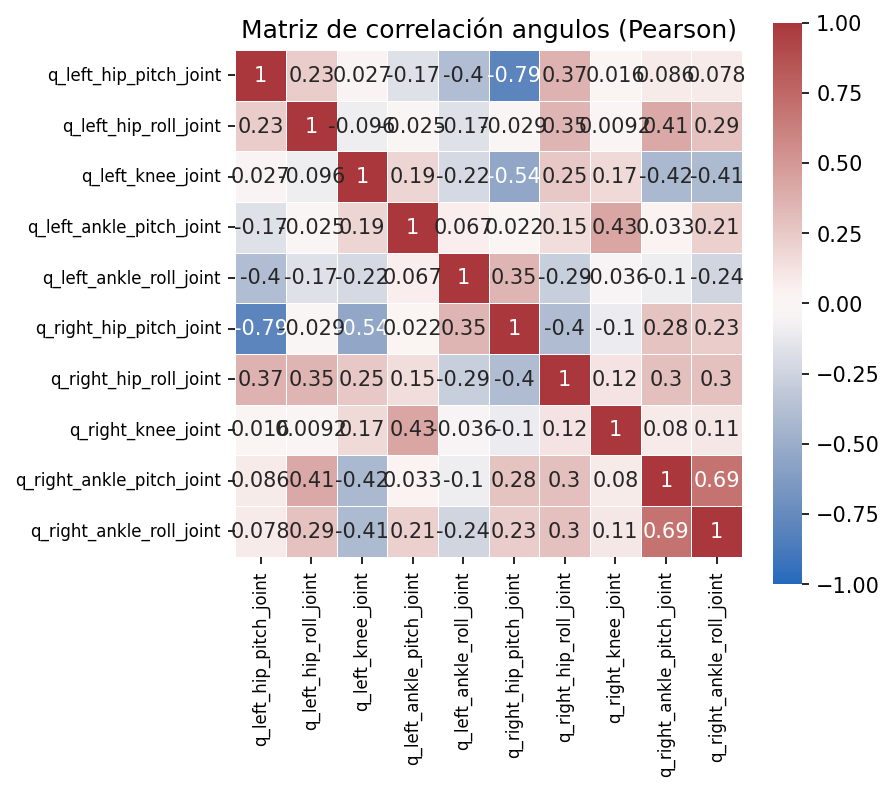

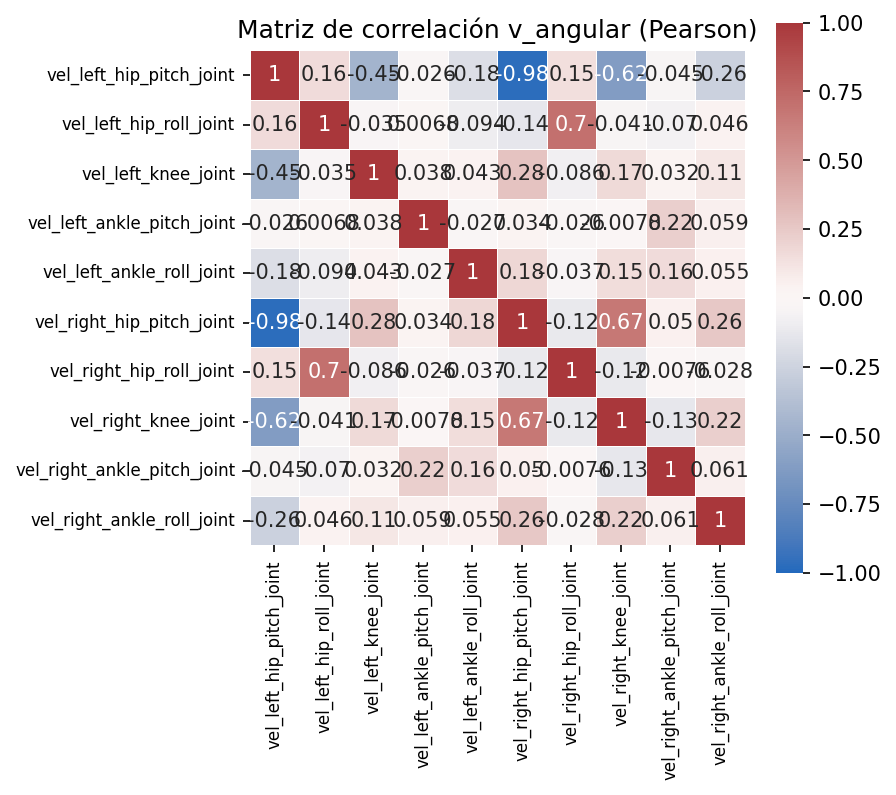

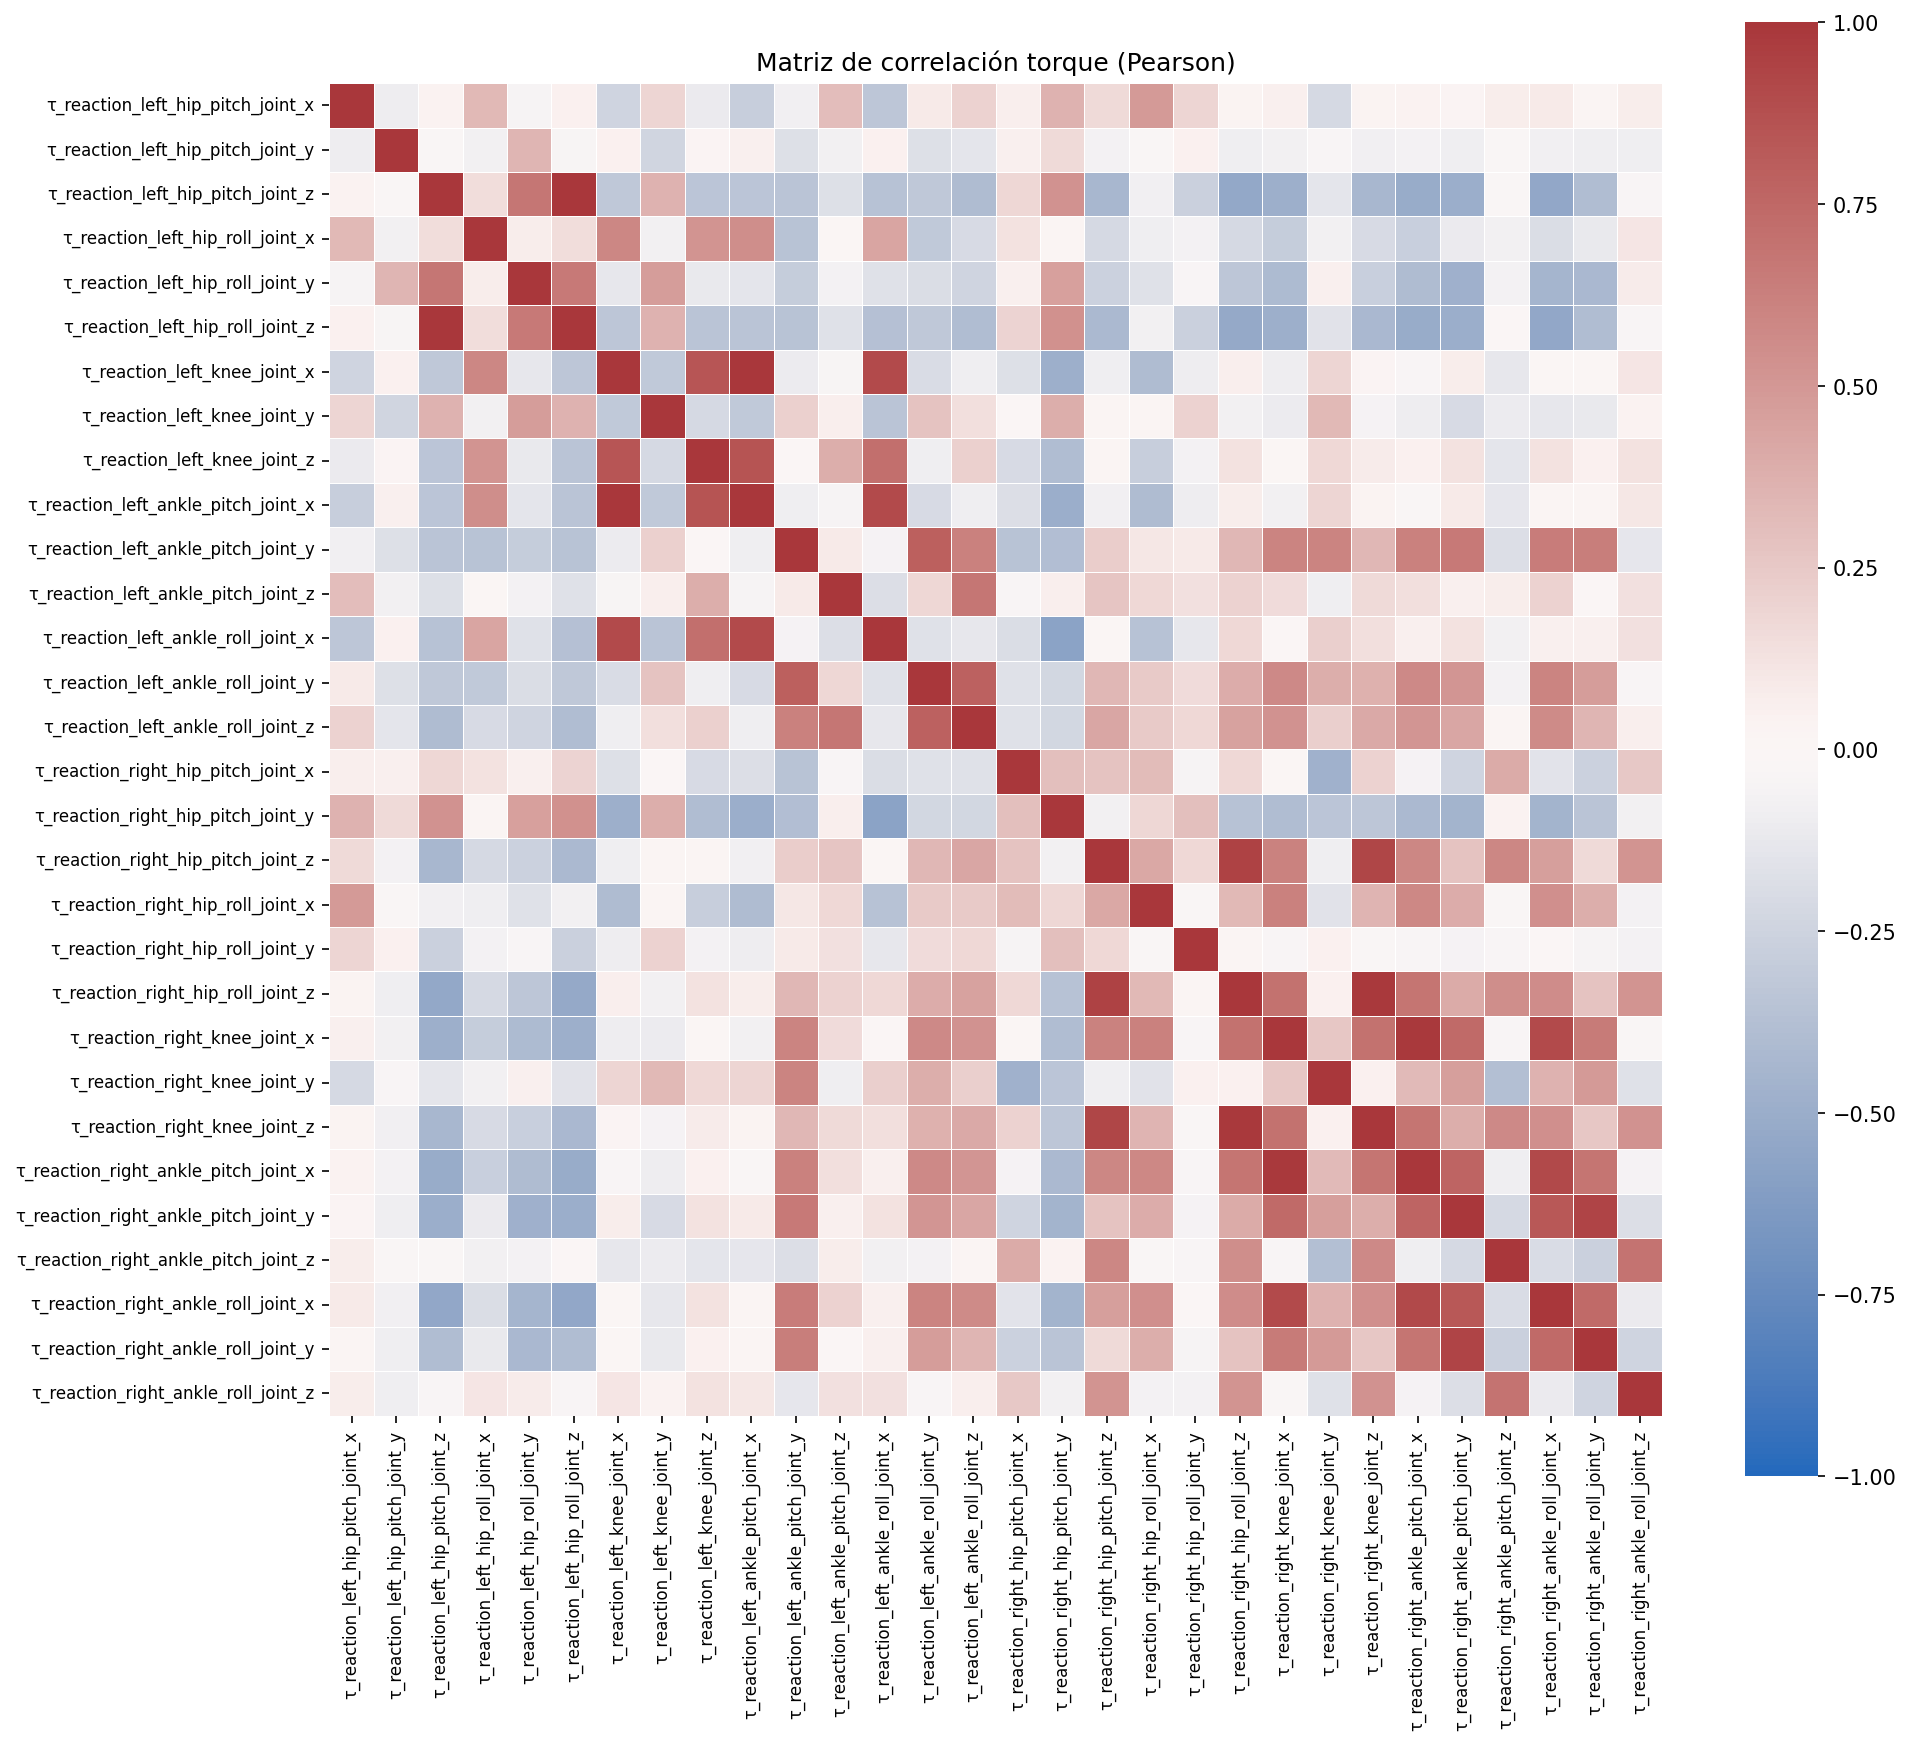

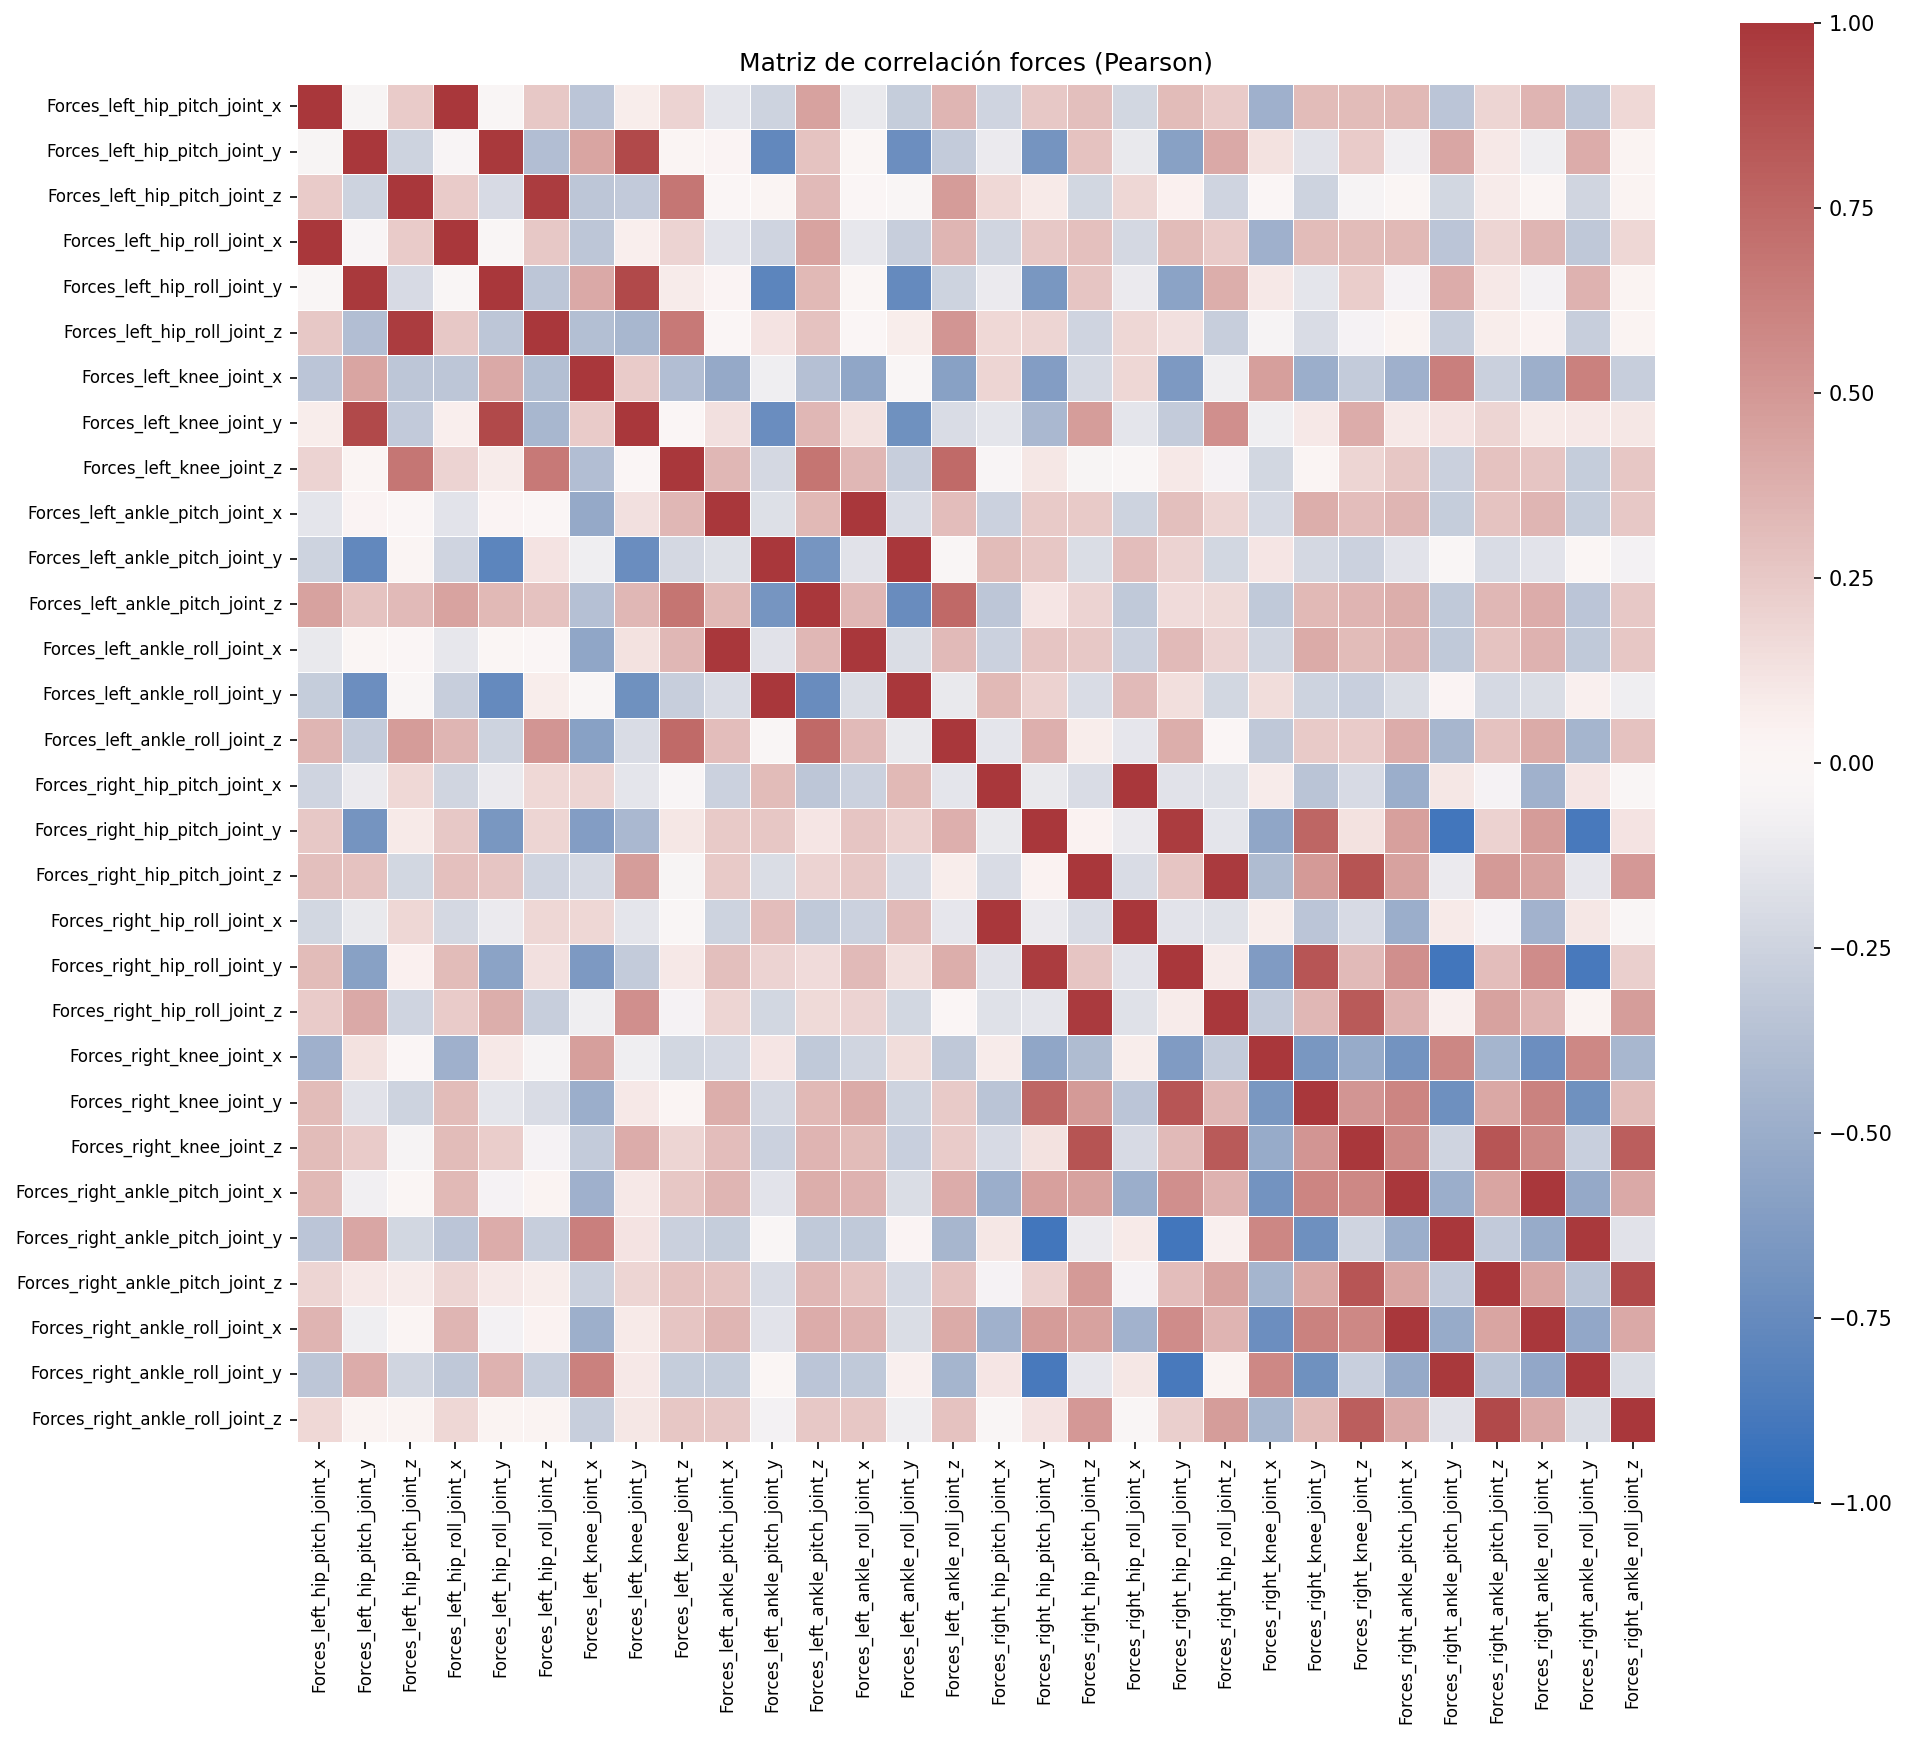

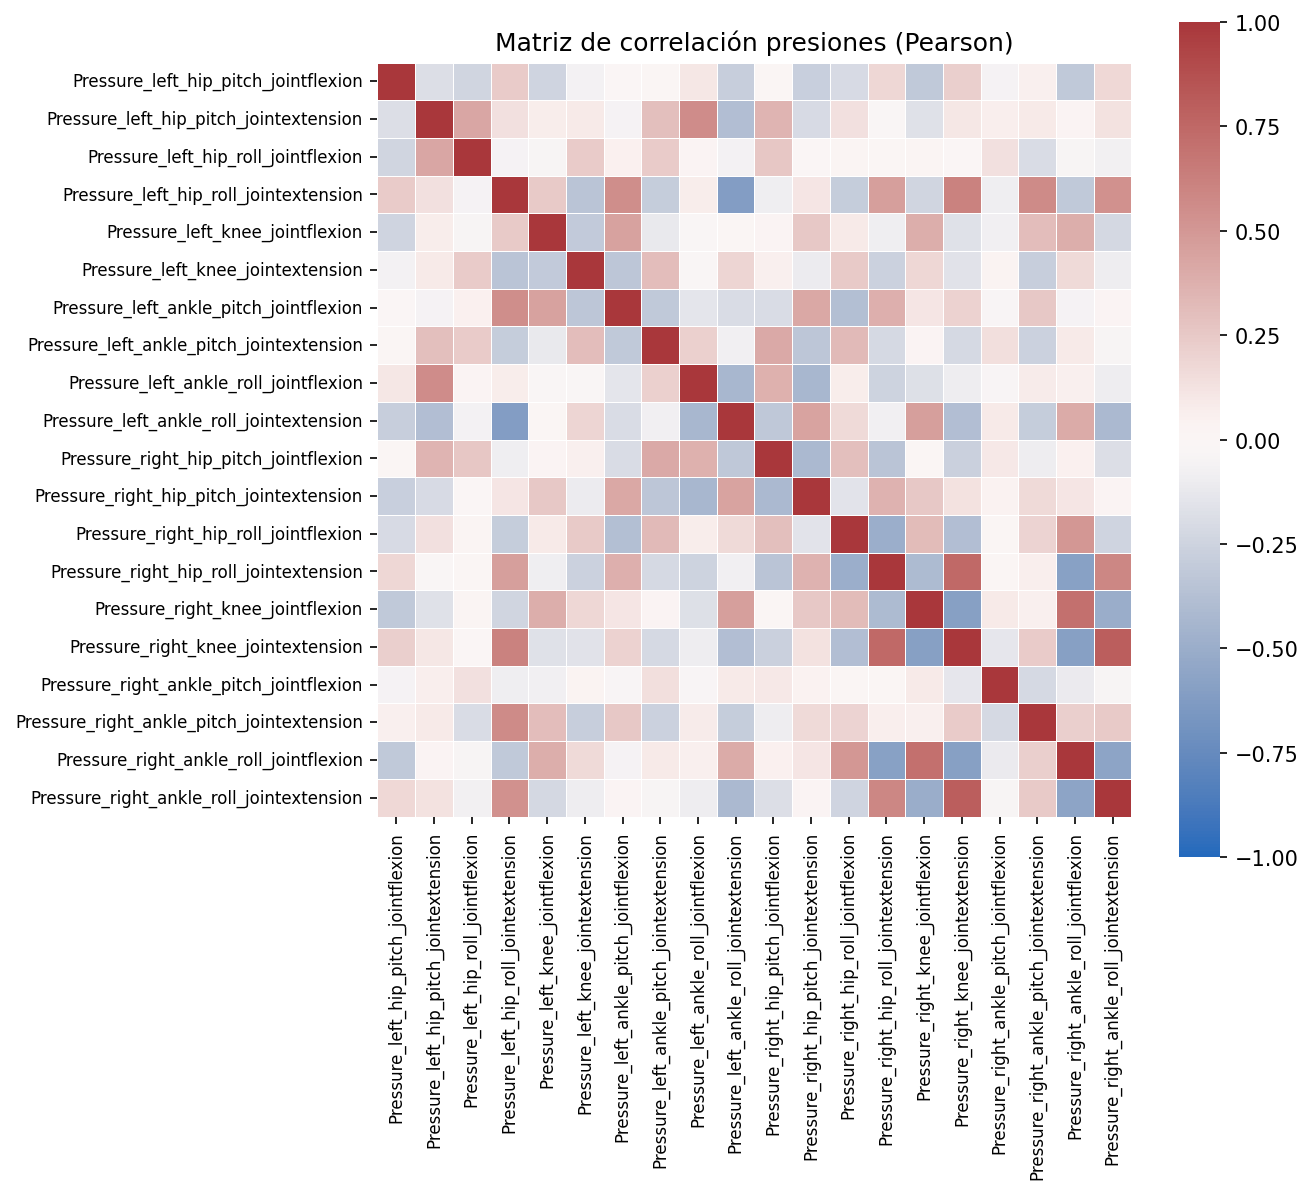

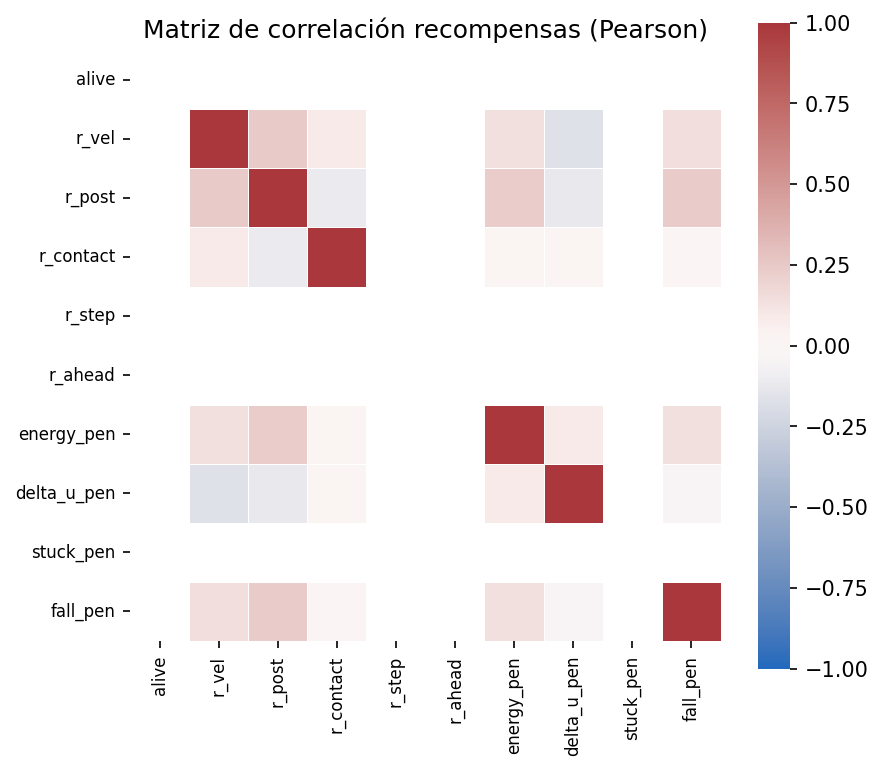

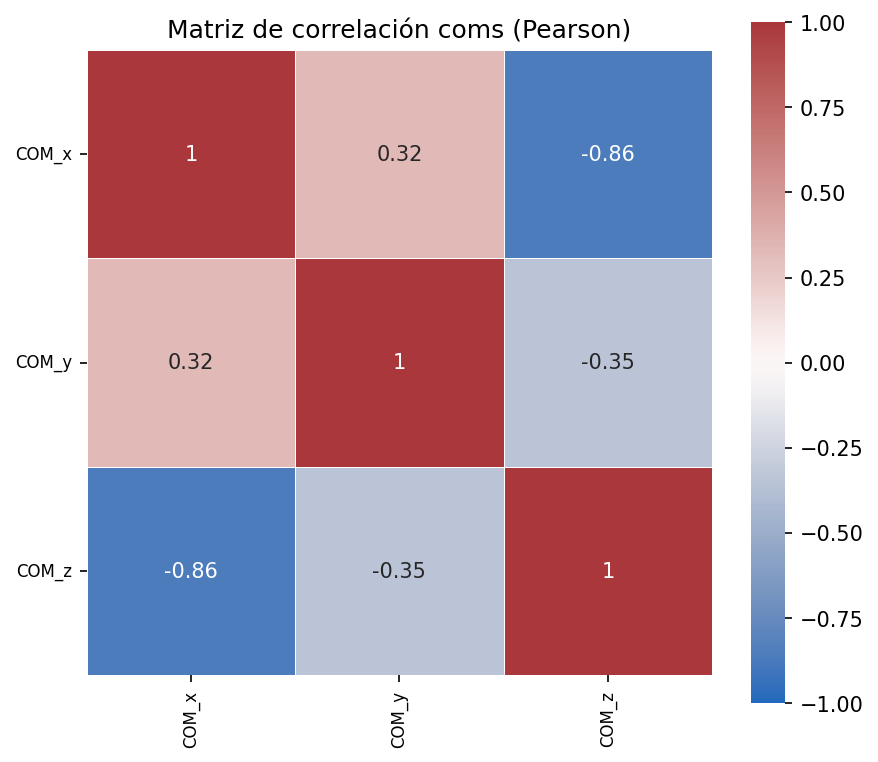

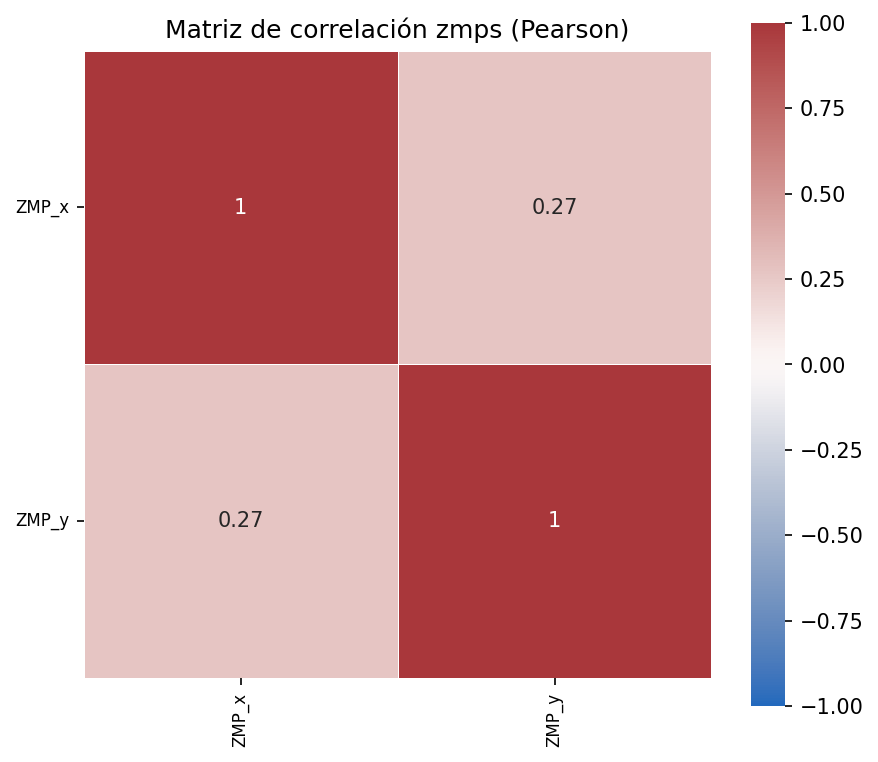

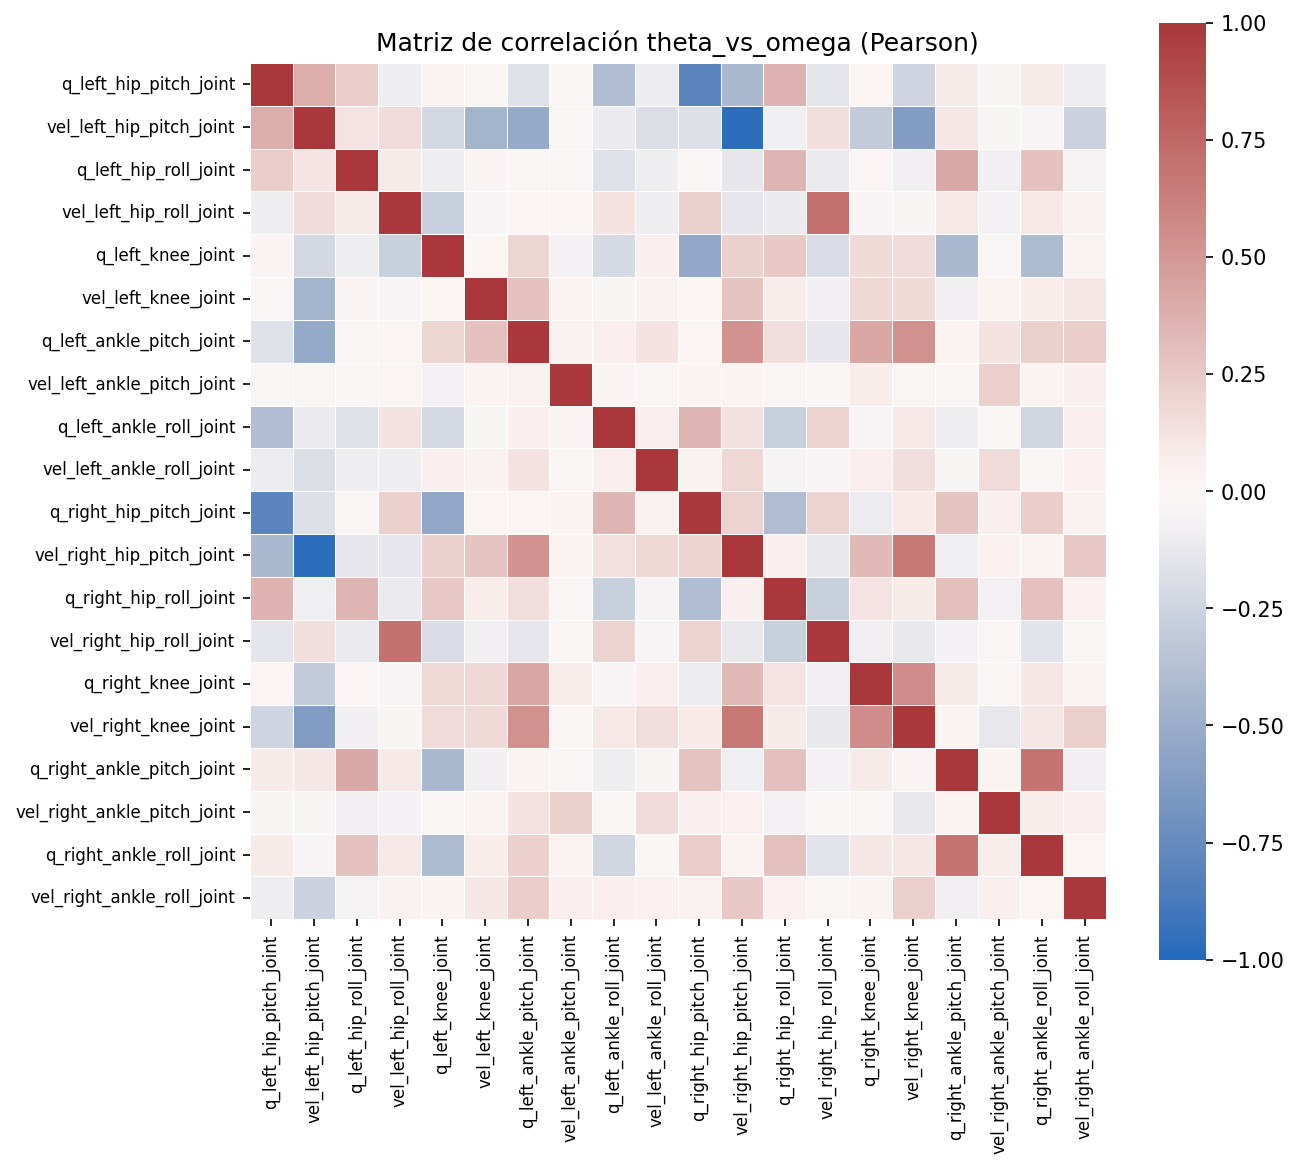

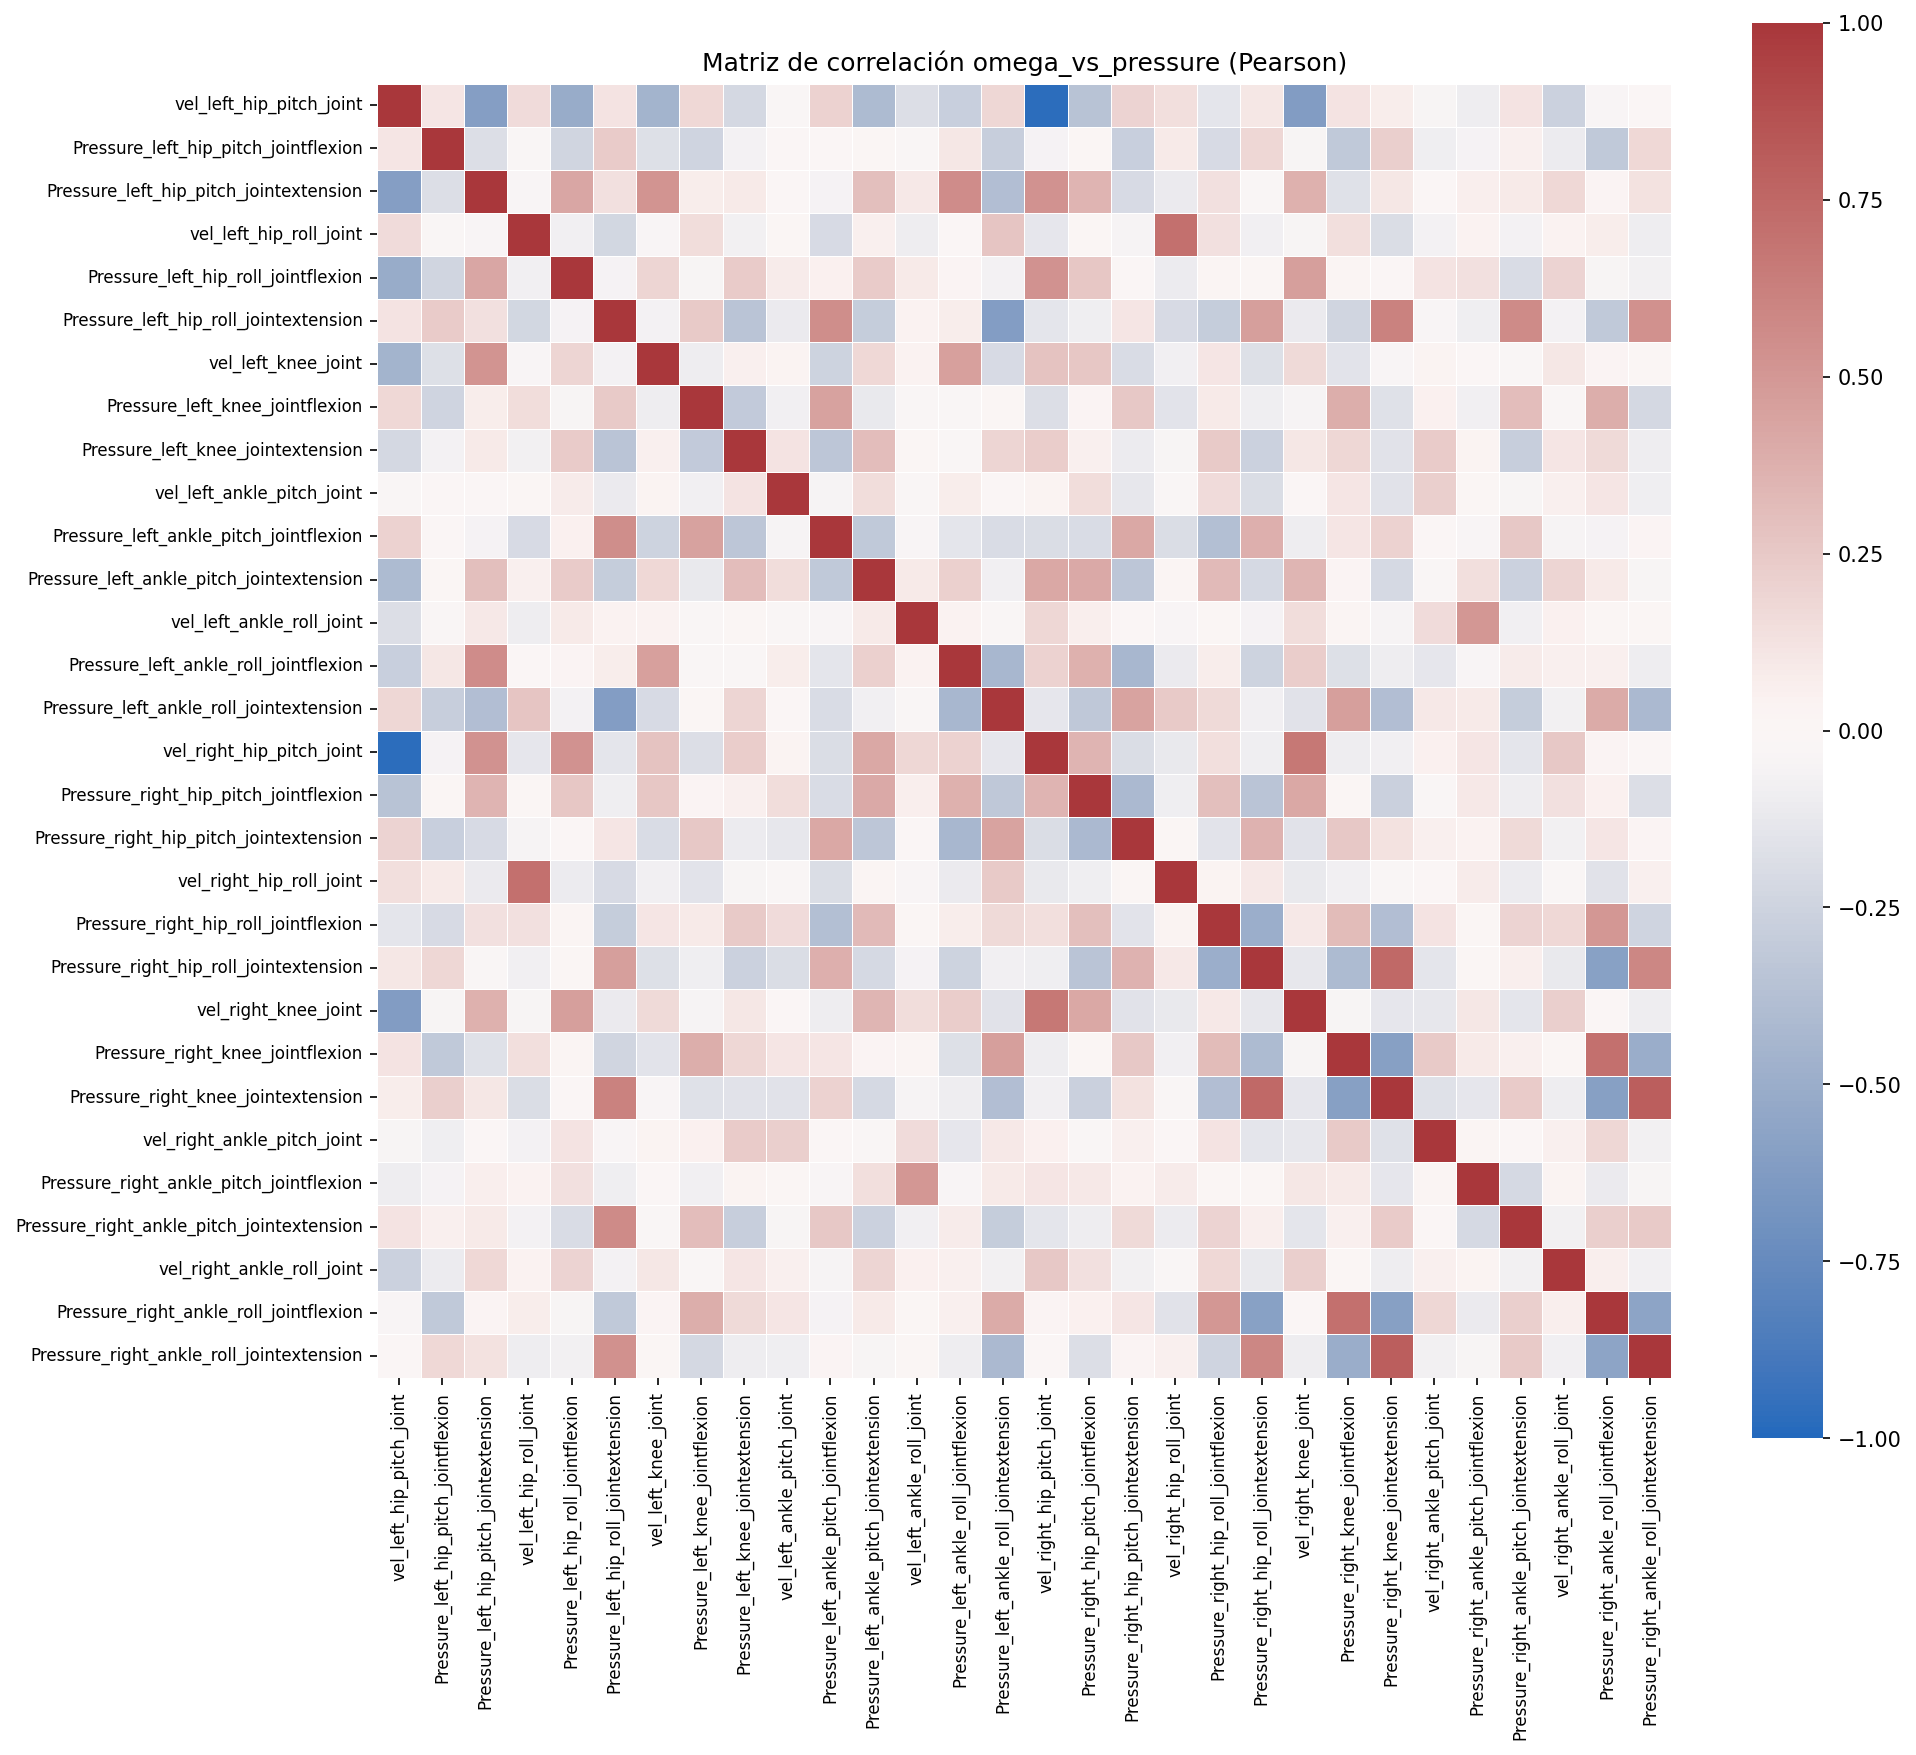

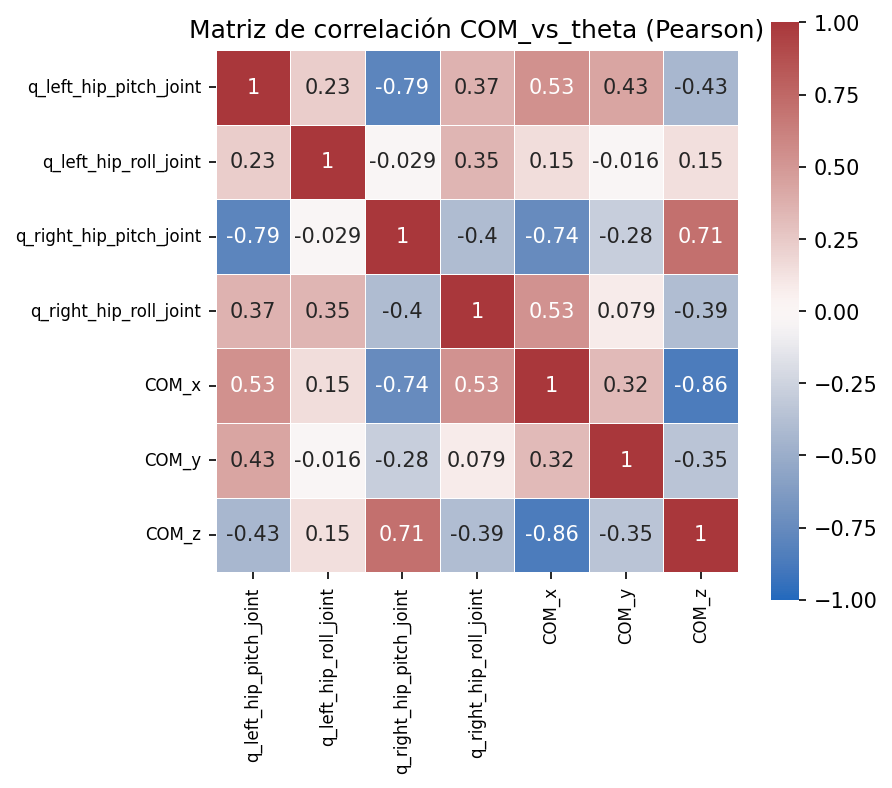

In [7]:
anglecouplinganalyzer.creacion_correlaciones(corr_angulos,"angulos")
anglecouplinganalyzer.creacion_correlaciones(corr_angular_speed, "v_angular")
anglecouplinganalyzer.creacion_correlaciones(corr_torque,"torque", annot=False)
anglecouplinganalyzer.creacion_correlaciones(corr_forces, "forces", annot=False)
anglecouplinganalyzer.creacion_correlaciones(corr_presiones, "presiones", annot=False)
anglecouplinganalyzer.creacion_correlaciones(corr_recompensas, "recompensas", annot=False)
anglecouplinganalyzer.creacion_correlaciones(corr_coms, "coms")
anglecouplinganalyzer.creacion_correlaciones(corr_zmp, "zmps")
anglecouplinganalyzer.creacion_correlaciones(corr_angulo_velocidad, "theta_vs_omega", annot=False)
anglecouplinganalyzer.creacion_correlaciones(corr_velocidad_presiones, "omega_vs_pressure", annot=False)
anglecouplinganalyzer.creacion_correlaciones(corr_com_angulo, "COM_vs_theta")